> TOC
```
Step 1. 데이터 불러오기
Step 2. 데이터 분할
     2-1. 시점(2020년) 기준 분할하기
     2-2. 데이터 길이 맞추기
     2-3. 데이터 분포 맞추기(스케일링)
Step 3. 통계 분석
     3-1. 회귀 분석
     3-2. 정규성 검정
     3-3. 상관성 검정
     3-4. 쌍체 검정
```

## Step 1. 데이터 불러오기

이제 데이터 불러오는 작업은 익숙해졌을 것입니다. 지난 글과 동일하게 야후파이낸스 패키지로 2010년 상장일부터 최근까지의 테슬라 주가를 가져오겠습니다.

In [2]:
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
plt.style.use('seaborn')


In [3]:
stocks = yf.Ticker('TSLA')

In [4]:
df = stocks.history(start='2010-01-01', end='2022-07-08')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2022-06-30,673.530029,688.369995,656.590027,673.419983,31533500,0,0.0
2022-07-01,681.000000,690.690002,666.359985,681.789978,24781500,0,0.0
2022-07-05,669.000000,699.440002,648.500000,699.200012,28193700,0,0.0


## Step 2. 데이터 분할

우선, 전체 기간의 데이터(종가)를 확인하겠습니다. 

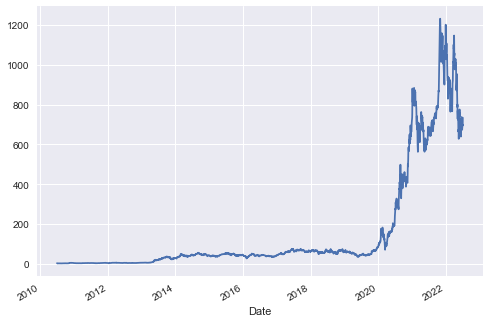

In [5]:
df['Close'].plot()
plt.show()

데이터를 봤을 때, 2020년 전후로 움직임에 많은 차이가 있는 것 같습니다. 2020년 이전에는 매우 잔잔했던 반면 그 이후는 급등과 급락을 반복하고 있습니다. 최근 2년간 테슬라 주가는 유례없는 움직임을 보이고 있습니다.​

데이터를 분석할 때는 분석하고자 하는 대상이 분명해야 합니다. 여기서는 '2020년 이전과 이후, 테슬라 주가 추세는 통계적으로 차이가 있는가?'를 확인하고자 합니다. 눈으로 봤을 때는 당연한 것이지만 이런 궁금증을 통계적으로 어떻게 확인할 수 있는가?를 배우는 데에 의의를 가져봅니다.

### 2-1. 시점(2020년) 기준 분할하기

2020년 이전과 이후를 비교할 것이므로 해당 시점을 기준으로 데이터셋을 분리합니다. 1장에서 배운 인덱싱을 활용합니다.

In [6]:
close_before = df['Close'][:'2019']
close_after = df['Close']['2020':]

print(f'[period : ~2019]\n{close_before.describe}')
print('\n')
print(f'[period : 2020~]\n{close_after.describe}')

[period : ~2019]
<bound method NDFrame.describe of Date
2010-06-29     4.778000
2010-06-30     4.766000
2010-07-01     4.392000
2010-07-02     3.840000
2010-07-06     3.222000
                ...    
2019-12-24    85.050003
2019-12-26    86.188004
2019-12-27    86.075996
2019-12-30    82.940002
2019-12-31    83.666000
Name: Close, Length: 2394, dtype: float64>


[period : 2020~]
<bound method NDFrame.describe of Date
2020-01-02     86.052002
2020-01-03     88.601997
2020-01-06     90.307999
2020-01-07     93.811996
2020-01-08     98.428001
                 ...    
2022-06-30    673.419983
2022-07-01    681.789978
2022-07-05    699.200012
2022-07-06    695.200012
2022-07-07    733.630005
Name: Close, Length: 633, dtype: float64>


print() 문으로 값을 출력할 때, f-string이라는 문자열 포멧팅을 사용했습니다. f로 시작해 따옴표(')로 감싸면, 그 안에서 중괄호({, })에 넣어준 변수를 변수에 담긴 값으로 문자열을 변환해 주게 됩니다. {close_before.describe}, {close_after.describe}가 그것입니다. 만약 문자열 포멧팅 없이 그냥 변수를 넣어줬다면 아래와 같이 출력되겠죠.

In [7]:
print('[period : ~2019]\nclose_before.describe')

[period : ~2019]
close_before.describe


참고로 가운데 '\n'(엔터키 바로 위 자판 + n입니다. 윈도우에서는 원화 표시, 맥에서는 역슬래시입니다.) 은 '줄바꿈'을 의미합니다. ​

이제, 분할한 데이터를 한 그래프에 표시하면 아래와 같이 연결되어 그려질 것입니다.

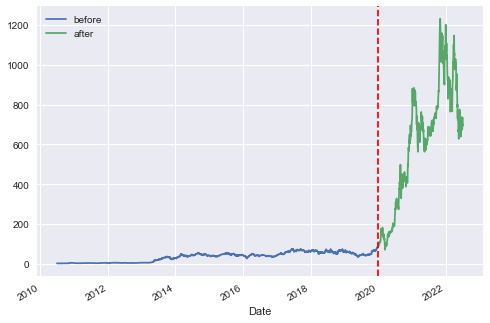

In [10]:
close_before.plot(label='before')
close_after.plot(label='after')

plt.axvline(x=close_after.index[0], c='red', linestyle='--')
plt.legend()

plt.show()

### 2-2. 데이터 길이 맞추기

집단 간 비교 분석을 위해서는 데이터 길이가 일치해야 합니다. 2020년 이전의 데이터가 상대적으로 더 많기 때문에 가까운 시점을 기준으로 2020년 이후 데이터 길이와 동일하게 잘라주겠습니다.

close_after의 길이를 변수 l에 담고, iloc 인덱싱을 통해 뒤쪽부터 l 만큼 잘라줬습니다. 잘라준 값은 다시 close_before에 담았습니다.

In [12]:
l = len(close_after)
close_before = close_before.iloc[-l:]

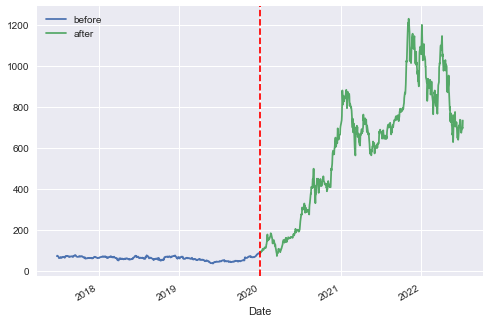

In [13]:
close_before.plot(label='before')
close_after.plot(label='after')

plt.axvline(x=close_after.index[0], c='red', linestyle='--')
plt.legend()

plt.show()

데이터 길이를 맞췄다면, x 축의 기간 정보를 제거하고 하나의 X축 선상에 그려주겠습니다


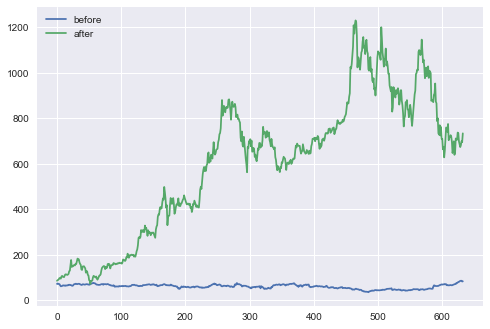

In [14]:
plt.plot(close_before.values, label='before')
plt.plot(close_after.values, label='after')

plt.legend()

plt.show()

그려놓고 보니 before의 움직임은 거의 보이지 않습니다. 상대적으로 after의 데이터 분포가 더 넓기 때문입니다. 최근 주가가 많이 상승한 까닭입니다. 이럴 때에는 동일한 스케일의 분포로 맞춰주는 것이 좋습니다. 분포를 동일하게 맞춰야만 두 기간의 주가 차이가 아니라 주가 추세에 주목할 수 있기 때문입니다. 서두에 언급한 것처럼 우리가 분석을 통해 확인하고자 하는 것은 '주가 추세에 차이가 있는가?'입니다.

### 2-3. 데이터 분포 맞추기(스케일링)

스케일링 방법은 다양하지만 그중에서도 가장 직관적으로 이해하기 쉬운 Min-Max Scaling 방식을 사용하겠습니다. Min-Max Scaling은 최댓값과 최솟값의 차이를 기준으로 분포 내 각각의 데이터와 최솟값의 차이를 나타내는 방식입니다. 이를 통해 어떤 데이터라도 그 분포를 0과 1사이로 변환할 수 있습니다.

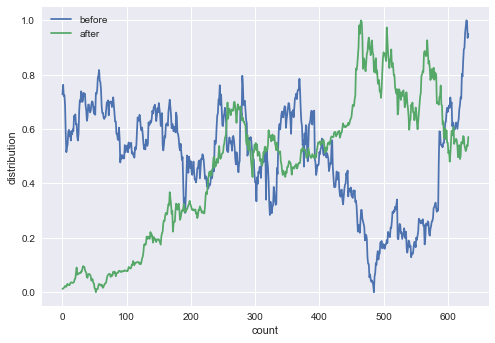

In [16]:
import numpy as np

scaled_before = (close_before - np.min(close_before))
scaled_before /= (np.max(close_before) - np.min(close_before))

scaled_after = (close_after - np.min(close_after)) 
scaled_after /= (np.max(close_after) - np.min(close_after))

plt.plot(scaled_before.values, label='before')
plt.plot(scaled_after.values, label='after')

plt.legend()
plt.ylabel('distribution')
plt.xlabel('count')

plt.show()

y 축을 보면 0과 1사이에 모든 데이터가 들어온 것을 확인할 수 있습니다.

## Step 3. 통계 분석

### 3-1. 회귀 분석

정말 간단하게 회귀선을 그리는 법을 알아보겠습니다. 회귀선은 기본적으로 인과관계를 나타내기 위해 두 변수 간 관계를 1차원 수식으로 정의하는 것입니다. 비선형(2차원 이상) 그래프로 적합시키는 것이 아니기 때문에 모든 형태의 데이터 관계성을 표현하기는 어렵습니다. 또한, 지금의 케이스처럼 서로 다른 두 시점 간 차이를 볼 때에는 사실 회귀 분석은 적합한 방식이 아닙니다. 하지만 파이썬으로도 아주 간단하게 회귀선을 그려보고 회귀계수와 유의수준을 확인해 볼 수 있음을 알고 나면 추후 인과 분석 테스크에서 유용하게 활용할 수 있겠습니다.

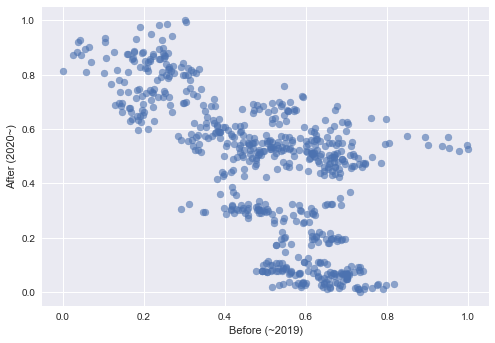

In [60]:
plt.scatter(x=scaled_before.values, y=scaled_after.values, alpha=0.6)
plt.xlabel('Before (~2019)')
plt.ylabel('After (2020~)')
plt.show()

먼저 이렇게 두 변수를 2차원 평면의 각 축에 놓고, 변수 간 상대적 데이터를 산점도로 표시합니다. x축은 before, y 축은 after로 두었습니다.

그다음, seaborn 패키지의  regplot() 함수를 사용해 regression 그래프를 그려줍니다.

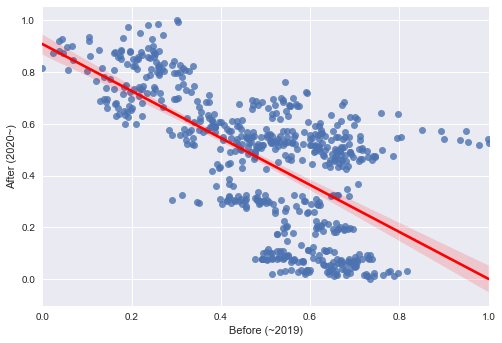

In [17]:
import seaborn as sns

sns.regplot(x=scaled_before.values, y=scaled_after.values, line_kws={"color": "red"})

plt.xlabel('Before (~2019)')
plt.ylabel('After (2020~)')
plt.show()

seaborn은 matplotlib을 기반으로 통계 그래프를 그릴 수 있게 확장된 시각화 라이브러리입니다. 따라서 그래프 함수 자체에 대한 matplotlib과 기본적인 사용법은 유사하고, matplotlib 함수를 사용해 레이아웃이나 타이틀 등을 동일하게 설정할 수 있습니다.​

이렇게 회귀선을 적합할 때는 내부적으로 OLS(최소자승법, Ordinary Least Squares)라고 해서 2차원 평면 내 모든 점들과의 거리가 최소가 되는 하나의 1차원 선을 그려내는 기법을 사용합니다. 최소 자승(제곱) 법이라는 이름이 붙은 것은 점이 선보다 아래에 있으면 음수, 위에 있으면 양수가 나올 텐데 이것을 그대로 합하면 제대로 거리를 계산해낼 수 없으니 점과 선간 거리를 모두 '제곱'해서 합하는 방식을 사용하기 때문입니다.


이 OLS 기법을 통해 제대로 식이 계산되었는지 확인하고자 한다면 statsmodels 패키지를 사용하면 됩니다.

In [18]:
import statsmodels.api as sm
res = sm.OLS(endog=scaled_after.values, exog=sm.add_constant(scaled_before.values)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           6.66e-76
Time:                        21:34:23   Log-Likelihood:                 121.17
No. Observations:                 633   AIC:                            -238.3
Df Residuals:                     631   BIC:                            -229.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9089      0.023     40.089      0.000       0.864       0.953
x1            -0.9090      0.043    -21.233      0.000      -0.993      -0.825
==============================================================================
Omnibus:                       36.247   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.180
Skew:                          -0.032   Prob(JB):                     0.000833
Kurtosis:                       2.270   Cond. No.                         6.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

sm.OLS 함수는 endog와 exog라는 2개의 인자를 받습니다. endog는 endogenous의 약자로 내생변수이자 종속변수인 y를 의미합니다. 그리고 exog는 exogenous의 약자로 외생변수이자 독립변수인 x를 의미합니다. sm.add_constant() 함수로 scaled_before.values를 묶어준 것은 회귀식에 상수항을 추가하기 위함입니다.

 위에서 확인한 것처럼 회귀선이 (0,0) 좌표에서 출발하지 않고 y가 1에 가까운 상단에서 시작됩니다. 따라서 1에 가까운 상수항을 먼저 표현해 주고, 그것에서부터 출발한 기울기를 구할 수 있습니다.

위쪽의 붉은 박스 R-squared(결정 계수)는 0에서 1사이로 회귀선이 관측치들을 얼마나 잘 표현하는가를 알려줍니다. 선으로부터 점들이 멀수록 R-squared 값은 0에 가까워집니다. 현재 산점도로 볼 때, 점의 흩어짐 정도가 강하기 때문에 높지 않은 수치를 보여주고 있습니다.

그 아래 박스를 보면 상수항(const), 그리고 독립변수(x1)의 계수와 t 값 등이 표기되어 있습니다. 그중에서 지금 회귀선을 표현하는 변수들, 그러니까 상수항과 독립변수가 각각 유의한가를 알려주는 것이 P>|t| 부분이 되겠습니다. 이것은 P-value를 나타내는 것으로, 0.05 이내에 들어오면 '유의하다'라고 말합니다. 즉, 지금의 회귀선은  신뢰할 수 있는 const와 x1 계수(coef, coefficient)로 표현되었다고 할 수 있습니다. 

- 상수항 추가(const), 상수항 : 0.7(p<0.05로 유의)
- 회귀계수 : -0.46(p<0.05로 유의)
- 설명력(R^2) : 0.42


but. 회귀분석은 기본적으로 인과관계 검정을 위한 용도입니다. 시점이 다른 동일 주가에 대해 인과성 검정은 적합하지 않습니다.  

### 3-2. 정규성 검정

이렇게 간단히 회귀 분석을 알아봤고, 이제부터는 상관 분석, 쌍체 검정을 실시할 것입니다. 그전에 선행되어야 할 것이 바로 정규성 검정입니다. 상관 분석을 하고자 하는 변수들은 각각 정규성을 확보하는 것을 전제로 합니다. 만약 정규성을 확보하지 못했다면 30회(개) 이상의 충분한 관측 표본으로 구성되어야만 합니다. 표본이 정규분포를 띄지 않더라도 표본이 충분하다면, 중심극한정리에 의해 모집단은 정규분포로 수렴할 수 있습니다. 중심극한정리와 정규분포에 대해서는 구글링을 통해 더 자세히 알아보시길 추천드립니다.

일반적으로, 표본이 충분하더라도 정규성 검정을 통해 분포는 확인하고 넘어가는 것이 좋습니다. 표본 자체의 정규성은 표본대 표본 간 비교 분석의 신뢰성을 더해주기 때문입니다. 따라서 이번 분석에서도 정규성 검정을 실시해 봅니다.

subplot을 사용해 1행 2열 레이아웃으로 그래프를 그립니다.

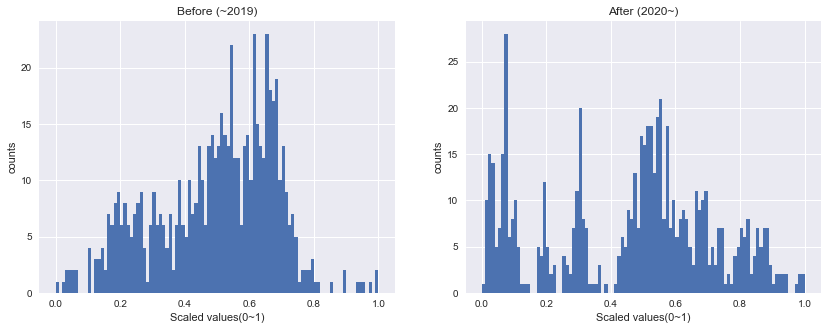

In [83]:
plt.figure(figsize=(14,5))

plt.subplot(121)
plt.hist(scaled_before.values, bins=100)
plt.title('Before (~2019)')
plt.xlabel('Scaled values(0~1)')
plt.ylabel('counts')

plt.subplot(122)
plt.hist(scaled_after.values, bins=100)
plt.title('After (2020~)')
plt.xlabel('Scaled values(0~1)')
plt.ylabel('counts')
plt.show()

bins 옵션을 통해 몇 개의 bar로 차트를 구성할 것인가에 대한 정보를 입력해 줬습니다. 각 분포를 눈으로 봤을 때, 둘 다 정규분포로 보이지는 않습니다. 특히 After(2020년 이후)의 경우 그 정도가 더 강합니다. 정규성 검정은 kolmogorov-smirnov 방식을 사용하며 수치/과학 연산을 위한 scipy 패키지에서 제공하는 kstest()로 간단히 수행할 수 있습니다. 

kolmogorov-smirnov 검정은 '정규분포를 따른다'를 귀무가설로 합니다. Before, After 모두 p-value가 0.05보다 작으므로 귀무가설을 기각할 수 있습니다. 즉, 두 기간의 종가(표본) 분포는 정규분포를 따르지 않습니다.

하지만, 표본이 충분하므로 상관 검정과 쌍체검정(T-Test 유형 중 하나)를 실시할 수 있습니다. 

Kolmogorov-Smirnov Test : 

- 귀무가설: 정규분포를 따른다.
- 연구가설: 정규분포를 따르지 않는다.

In [24]:
from scipy import stats

s, p = stats.kstest(scaled_before.values, 'norm')
print(f'[Before (~2019)] stats: {s:.2f} p-value: {p:.2f}')
s, p = stats.kstest(scaled_after.values, 'norm')
print(f'[After (2020~)] stats: {s:.2f} p-value: {p:.2f}')

[Before (~2019)] stats: 0.53 p-value: 0.00
[After (2020~)] stats: 0.50 p-value: 0.00


결론: 귀무가설 기각(p-value<0.05), 둘 다 정규분포를 따르지 않는다.


### 3-3. 상관성 검정

상관성 검정의 경우 대표적으로 피어슨 방식과 스피어만 방식이 있습니다. 피어슨 검정의 경우 표본이 충분하거나 정규분포 가정을 만족하는 경우 사용 가능하며, 스피어만 검정은 그렇지 않은 케이스에 대해 표본의 순위-비교 방식으로 상관성을 확인할 수 있습니다.

여기서는 표본이 충분해야 한다는 조건을 만족하므로 피어슨 검정을 사용합니다. 피어슨 검정 역시 scipy 패키지를 통해 사용할 수 있으며 귀무가설은 '두 잡단은 서로 선형적 상관관계가 없다'입니다.

Pearson Test :
- 귀무가설 : 상관관계가 없다.
- 연구가설 : 상관관계가 있다.

In [26]:
c, p = stats.pearsonr(x=scaled_before.values, y=scaled_after.values)
print(f'stats: {c:.2f} p-value: {p:.2f}')

stats: -0.65 p-value: 0.00


결론 : 귀무가설 기각(p-value<0.05), 음(-0.65)의 상관관계가 있다.

p-value < 0.05로, 귀무가설을 기각합니다. 즉, 두 기간에 대한 추세는 서로 상관관계가 있습니다. 그런데 stats를 보면 -0.65로 음의 상관관계를 보입니다. 같은 주가의 다른 기간에 대해 음의 상관관계를 보인다는 것은 추세가 뒤바뀌었다는 것으로 해석해 볼 수 있겠습니다.

### 3-4. 쌍체 검정

사실 엄밀히 말하면 위 상관 분석 역시 전제에 오류가 있습니다. 상관 분석 시 비교 대상 타겟은 서로 다른 두 모집단입니다. 다시 말해, 서로 다른 두 모집단에서 발생한 각각의 표본을 분석해 모집단 간의 상관성이 있냐? 없냐?를 분석하는 것입니다. 그러나 before, after가 서로 다른 모집단에서 발생한 표본이라고 정의할 수 없습니다. 기간이 다를 뿐, 둘 다 테슬라의 주가(종가)라는 동일 집단에서 추출한 샘플이기 때문입니다. 

따라서 이런 경우 T-Test 중에서 특정 이벤트 발생 전후 차이를 비교할 수 있는 쌍체 검정(Paired-Sample T-Test)을 사용할 수 있습니다. 역시 scipy 패키지를 사용하며, 귀무가설은 '두 분포 간 평균에는 차이가 없다'입니다.

Paired-Sample T-Test : 
> 같은 집단 & 다른 시점에 대한 비교
- 귀무가설 : 두 분포간 평균에는 차이가 없다.
- 연구가설 : 두 분포간 평균에는 차이가 있다.

In [99]:
t, p = stats.ttest_rel(a=scaled_before.values, b=scaled_after.values)
print(f'stats: {t:.2f} p-value: {p:.2f}')

stats: 2.34 p-value: 0.02


결론: 귀무가설 기각(p-value<0.05), 두 분포는 서로 다른 분포다.

p-value<0.05로, 두 분포 간 평균에 차이가 있음을 확인했습니다. 단순히 종가 데이터로 비교한 것이 아니라 기간 범위를 맞추고 0과 1 사이로 스케일링했을 때, 이와 같이 각 집단 평균이 서로 유의하게 다르다면, 우리는 2020년을 기점으로 추세가 바뀌었다고 해석할 수 있겠습니다.​

이번에는 이렇게 파이썬을 활용해 여러 가지 통계 검정을 실시해 보았습니다. 이외에도 statsmodels와 scipy 패키지는 많은 통계 분석 함수들을 제공하고 있으니 스스로 가설을 세우고 직접 분석해가면서 학습을 이어나가시면 좋겠습니다.